In [17]:
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd

In [18]:
data = r"D:\parameter_studies\fertilizer-consumption-usda.csv"  # https://ourworldindata.org/fertilizers
df = pd.read_csv(data)
fertilizers = df.loc[df['Entity'] == 'World']
# fill values from 1800 to 1960 with 0
for year in range(1961, 1850, -1):
    new_row = pd.DataFrame({'Year': year, 'Entity': 'World', 'fertilizer_quantity': np.nan}, index=[year])
    fertilizers = pd.concat([new_row, fertilizers])

In [19]:
data = r"D:\parameter_studies\population.csv"  # https://ourworldindata.org/grapher/population
df = pd.read_csv(data)
population = df.loc[(df['Entity'] == 'World') & (df['Year'] > 1850) & (df['Year'] < 2020)]

In [20]:
#https://www.usgs.gov/media/files/nitrogen-historical-statistics-data-series-140
ammonia = 17.0/14.0*np.array([2380000,3330000,3950000,4560000,4810000,5240000,5300000,6450000,7300000,8070000,8620000,9270000,10800000,11800000,12900000,14000000,11900000,17100000,19400000,21800000,
    25000000,28700000,32100000,35900000,38800000,41100000,43000000,46700000,48400000,49500000,56900000,62000000,67200000,71100000,73600000,77000000,75900000,80400000,88600000,91000000,91100000,
    95100000,99300000,99300000,97500000,93800000,93400000,91600000,93800000,100000000,105000000,103000000,104000000,107000000,108000000,105000000,109000000,110000000,117000000,122000000,125000000,
    131000000,128000000,128000000,132000000,139000000,145000000,140000000,140000000,142000000,144000000,141000000,141000000,142000000])
years = np.array(range(1946, 2020))

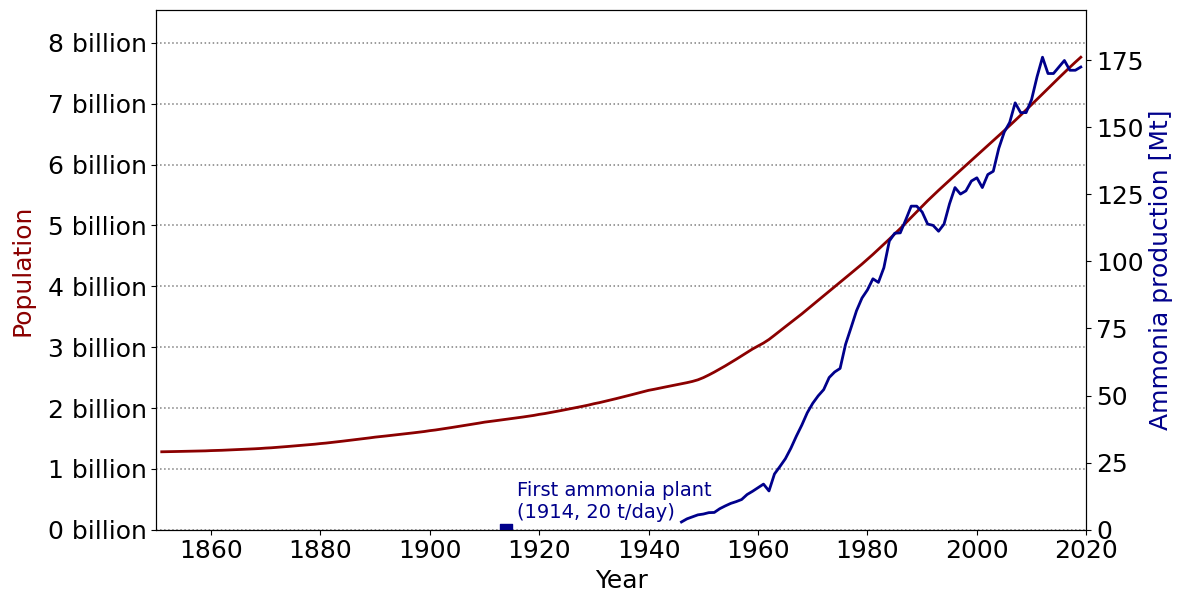

In [21]:
plt.style.use('default')
plt.rcParams.update({'font.size': 18, 'font.family': 'sans-serif'})

fig1 = plt.figure(figsize=(12, 6.75))
ax1 = fig1.add_subplot(axisbelow=True)
ax1.set_xlabel('Year')
ax2 = ax1.twinx()
ax1.set_xlim([1850, 2020])

#ax2.plot(fertilizers['Year'], 1e-6*fertilizers['fertilizer_quantity'], color = 'darkblue', linewidth = 2)
ax1.plot(population['Year'], 1e-9*population['Population (historical estimates)'], color = 'darkred', linewidth = 2)
ax2.plot(years, 1e-6*ammonia, color='darkblue', linewidth=2)
ax2.scatter([1914], [1e-6*7300], color='darkblue', marker='s', s=80)

#ax2.set_ylim([0, 1.1e-6*fertilizers['fertilizer_quantity'].max()])
ax2.set_ylim([0, 1.1e-6*ammonia.max()])
formatter = FuncFormatter(lambda x, pos: f'{x: .0f} billion')
ax1.yaxis.set_major_formatter(formatter)
ax1.set_ylim([0, 1.1e-9*population['Population (historical estimates)'].max()])

#ax2.set_ylabel('Fertilizer consumption [Mt]', color='darkblue')
ax2.set_ylabel('Ammonia production [Mt]', color='darkblue')
ax1.set_ylabel('Population', color='darkred')
ax2.text(1916, 3, 'First ammonia plant\n(1914, 20 t/day)', color='darkblue', horizontalalignment='left', verticalalignment='bottom', fontsize=14)

ax1.grid(color='k', axis='y', linestyle=':', linewidth=1.1, alpha=0.5)
ax2.grid(color='k', axis='y', linestyle=':', linewidth=1.1, alpha=0.0)

In [2]:
import matplotlib.pyplot as plt
import numpy as np   # matrices, math
import os    # file management
import pandas as pd   # data frames
import importlib   # for reloading your own files
from termcolor import colored   # for colored error messages

# my own file:
already_imported = 'de' in globals()
try:
    import full_bubble_model as de
except:
    try:
        import Bubble_dynamics_simulation.full_bubble_model as de
    except:
        print(colored(f'Error, \'full_bubble_model.py\' not found', 'red'))
if already_imported: importlib.reload(de)   # reload changes you made

model: chem_Otomo2018_without_O
target specie: NH3
excitation: sin_impulse (control parameters: ['p_A', 'freq', 'n'])
enable heat transfer: True	enable evaporation: False	enable reactions: True	enable dissipated energy: True


In [3]:
file_base_name = 'output_'
directory = r'D:\parameter_studies\2_plus_1_gradient_search'
folders = [folder for folder in os.listdir(directory) if '_atm' in folder]
pressures = [float(folder[:-4]) for folder in folders]
pressures.sort()
dfs = []
for pressure in pressures:
    folder = f'{pressure:.3f}_atm'
    df = pd.DataFrame()
    file_lens = []
    mins = []
    for file in os.listdir(os.path.join(directory, folder)):
        if file.startswith(file_base_name) and file.endswith('.csv'):
            try:
                current_data = pd.read_csv(os.path.join(directory, folder, file))
            except:
                print(colored(f'Error, could not read file {folder} / {file}', 'red'))
            for col in current_data.columns:
                if current_data[col].dtype == 'object' and all(current_data[col].dropna().map(lambda x: isinstance(x, bool))):
                    current_data[col] = current_data[col].astype(bool)
            df = pd.concat([df, current_data])
            file_lens.append(len(current_data))
            mins.append(current_data['energy_efficiency'].min())
    dfs.append(df)
    print(f'{folder}:')
    print(f'    best energy_efficiency:  {df["energy_efficiency"].min(): .4e} MJ/kg')
    mins = np.array(mins)
    file_lens = np.array(file_lens)
    print(f'    avarage best energy_efficiency:  {mins.mean(): .4f} MJ/kg')
    print(f'    max best energy_efficiency:  {mins.max(): .4f} MJ/kg')
    print(f'    average file length: {file_lens.mean(): .2f} rows')

0.005_atm:
    best energy_efficiency:   4.5684e+01 MJ/kg
    avarage best energy_efficiency:   62.2586 MJ/kg
    max best energy_efficiency:   97.2878 MJ/kg
    average file length:  263.13 rows
0.050_atm:
    best energy_efficiency:   1.0558e+02 MJ/kg
    avarage best energy_efficiency:   166.6059 MJ/kg
    max best energy_efficiency:   456.6670 MJ/kg
    average file length:  349.81 rows
0.100_atm:
    best energy_efficiency:   1.6585e+02 MJ/kg
    avarage best energy_efficiency:   197.6984 MJ/kg
    max best energy_efficiency:   527.8831 MJ/kg
    average file length:  220.41 rows
0.150_atm:
    best energy_efficiency:   2.2139e+02 MJ/kg
    avarage best energy_efficiency:   231.3856 MJ/kg
    max best energy_efficiency:   254.5191 MJ/kg
    average file length:  250.65 rows
0.200_atm:
    best energy_efficiency:   2.7427e+02 MJ/kg
    avarage best energy_efficiency:   333.9944 MJ/kg
    max best energy_efficiency:   1047.7344 MJ/kg
    average file length:  211.25 rows
0.250_atm:


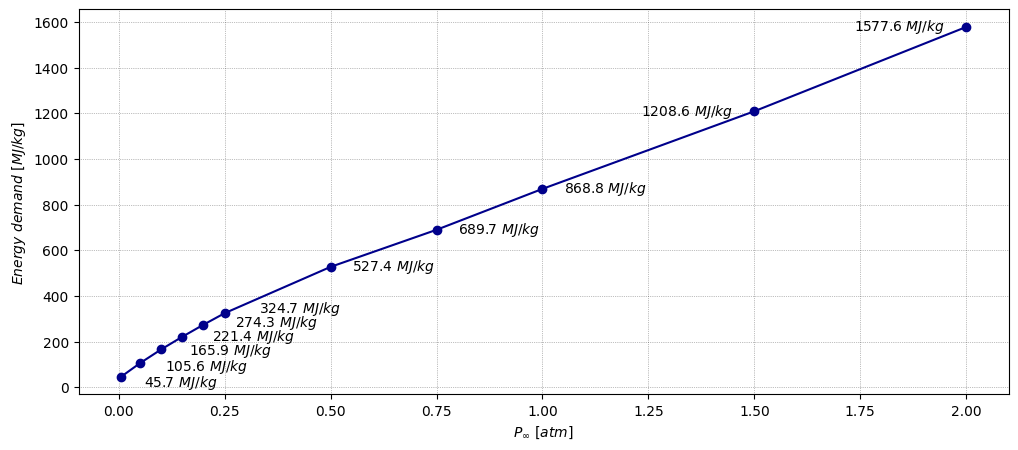

In [29]:
energies = [df['energy_efficiency'].min() for df in dfs]
x = -3
# set figure size
plt.figure(figsize=(12, 5))

plt.plot(pressures[:x], energies[:x], 'o-', color='darkblue')
plt.xlabel('$P_\infty \  [atm]$')
plt.ylabel('$Energy \ demand \ [MJ/kg]$')
#plt.yscale('log')
plt.grid(color='k', axis='both', linestyle=':', linewidth=0.5, alpha=0.5)

for i in range(len(pressures[:x])):
    line = dfs[i].loc[dfs[i]['energy_efficiency'] == dfs[i]['energy_efficiency'].min()]
    line = line.to_dict(orient='records')[0]
    text = f'$R_E={1e6*line["R_E"]: .1f}\ [\mu m];\ \ \ p_A={-1e-5*line["p_A"]: .2f}\ [bar]$'
    text = f'${line["energy_efficiency"]: .1f}\ MJ/kg$'
    if i > 8:
        orientation = 'right'
        pos = pressures[i]-0.05
    else:
        orientation = 'left'
        pos = pressures[i]+0.05
    if i < 6:
        energy = energies[i]*1.15-30
        pos *= 1.1
    else:
        energy = energies[i]
    plt.text(pos, energy, text, horizontalalignment=orientation, verticalalignment='center', fontsize=10, color='black')

f= 11898.14 +/-  2025.06 [Hz]


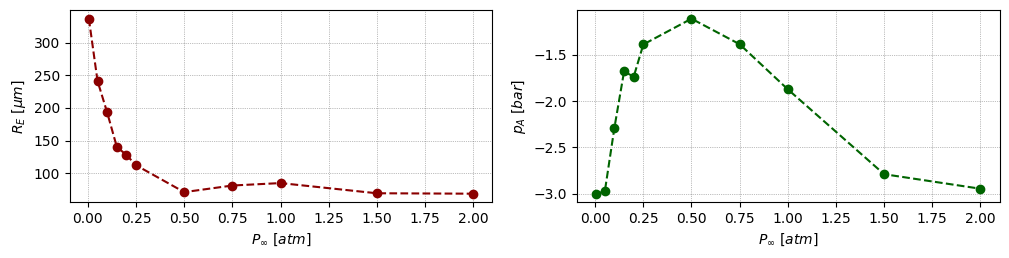

In [31]:
R_E = []
p_A = []
freq = []
for i in range(len(pressures[:x])):
    line = dfs[i].loc[dfs[i]['energy_efficiency'] == dfs[i]['energy_efficiency'].min()]
    line = line.to_dict(orient='records')[0]
    R_E.append(line['R_E'])
    p_A.append(line['p_A'])
    freq.append(10**line['logf'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 2.5))
ax1.plot(pressures[:x], 1e6*np.array(R_E), 'o--', color='darkred')
ax1.set_ylabel('$R_E \ [\mu m]$')
ax1.set_xlabel('$P_\infty \  [atm]$')
ax1.grid(color='k', axis='both', linestyle=':', linewidth=0.5, alpha=0.5)

ax2.plot(pressures[:x], 1e-5*np.array(p_A), 'o--', color='darkgreen')
ax2.set_ylabel('$p_A \ [bar]$')
ax2.set_xlabel('$P_\infty \  [atm]$')
ax2.grid(color='k', axis='both', linestyle=':', linewidth=0.5, alpha=0.5)

print(f'f={np.mean(freq): .2f} +/- {np.std(freq): .2f} [Hz]')
